In [ ]:
import pandas as pd
import numpy as np


In [ ]:
true_news = pd.read_csv("True.csv")
fake_news = pd.read_csv("Fake.csv")


In [ ]:
true_news.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_news.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_news["label"] = 1
fake_news["label"] = 0


In [ ]:
true_news.head()


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
fake_news.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
news_df = pd.concat([true_news, fake_news], axis=0)


In [ ]:
news_df = news_df.sample(frac=1).reset_index(drop=True)


In [ ]:
news_df.head()


,title,text,subject,date,label
0,U.S. education secretary calls Obama transgend...,WASHINGTON (Reuters) - U.S. Education Secretar...,politicsNews,"February 23, 2017",1
1,"Trump wins Christie backing, marches toward Su...","FORT WORTH, Texas (Reuters) - Republican candi...",politicsNews,"February 26, 2016",1
2,BREAKING! WIKILEAKS EMAIL Shows Bill Clinton A...,Hillary probably didn t know anything about th...,politics,"Oct 12, 2016",0
3,Detroit eyes refunding of up to $660 million b...,(Reuters) - Detroit would sell its first gener...,politicsNews,"June 14, 2016",1
4,"Illinois governor blasts House budget, Chicago...","SPRINGFIELD, Ill. (Reuters) - Just days before...",politicsNews,"May 29, 2016",1


In [ ]:
news_df.tail()


,title,text,subject,date,label
44893,Judge tells Trump University litigants they wo...,SAN DIEGO (Reuters) - The U.S. judge overseein...,politicsNews,"November 10, 2016",1
44894,Obama’s Labor Secretary Zaps Trump’s Foreign ...,Donald Trump doesn t have much foreign policy ...,News,"July 3, 2016",0
44895,Trump picks longtime friend of Beijing as U.S....,BEIJING/NEW YORK (Reuters) - President-elect D...,politicsNews,"December 7, 2016",1
44896,Trump’s Lawyer’s Response Was Riddled With Er...,Donald Trump hired himself a personal lawyer t...,News,"June 8, 2017",0
44897,James Clapper Himself Debunks “Russia Hacked U...,21st Century Wire says We ve seen it over and ...,Middle-east,"January 8, 2017",0


In [ ]:
import re


In [ ]:
def clean_text(text):
    text = text.lower()                    # convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text) # remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text)        # remove extra spaces
    return text


In [ ]:
news_df["clean_text"] = news_df["text"].apply(clean_text)


In [ ]:
news_df[["text", "clean_text"]].head()


,text,clean_text
0,WASHINGTON (Reuters) - U.S. Education Secretar...,washington reuters us education secretary bets...
1,"FORT WORTH, Texas (Reuters) - Republican candi...",fort worth texas reuters republican candidate ...
2,Hillary probably didn t know anything about th...,hillary probably didn t know anything about th...
3,(Reuters) - Detroit would sell its first gener...,reuters detroit would sell its first general o...
4,"SPRINGFIELD, Ill. (Reuters) - Just days before...",springfield ill reuters just days before the e...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words="english"
)


In [ ]:
X = vectorizer.fit_transform(news_df["clean_text"])
y = news_df["label"]

In [ ]:
X.shape, y.shape


((44898, 5000), (44898,))

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [ ]:
X_train.shape, X_test.shape


((35918, 5000), (8980, 5000))

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Initialize the model
model = PassiveAggressiveClassifier(max_iter=50)

# 2. Train the model using the training data
model.fit(X_train, y_train)

# 3. Predict on the test data to see how well it learned
y_pred = model.predict(X_test)

# 4. Calculate the accuracy
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 99.5%


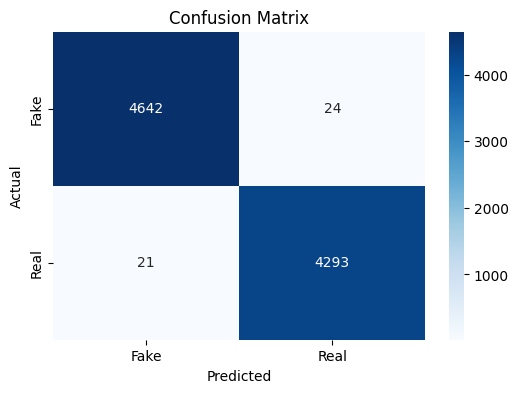

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it using a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def fake_news_det(news):
    # 1. Wrap the input in a list and transform it using the same vectorizer
    input_data = [news]
    vectorized_input_data = vectorizer.transform(input_data)

    # 2. Make a prediction
    prediction = model.predict(vectorized_input_data)

    print(f"The news is predicted as: {prediction[0]}")

# Let's test it right now!
# Replace the text below with any news headline you find today.
news_article = "Scientists discover that eating chocolate every day makes you live until 150 years old."
fake_news_det(news_article)

The news is predicted as: 0


In [ ]:
import pickle

# Save the trained model to a file
pickle.dump(model, open('model.pkl', 'wb'))

# Save the vectorizer (essential to transform new text the same way!)
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

print("Files saved: model.pkl and vectorizer.pkl")

Files saved: model.pkl and vectorizer.pkl


In [ ]:
%%writefile app.py
import streamlit as st
import pickle

# Load model and vectorizer
model = pickle.load(open("model.pkl", "rb"))
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))

st.title("📰 Fake News Detector")
st.caption("⚠️ This model predicts based on learned text patterns, not real-time fact verification.")


# -------------------------------
# Session state (important fix)
# -------------------------------
if "news_text" not in st.session_state:
    st.session_state.news_text = ""

# -------------------------------
# Form
# -------------------------------
with st.form(key="news_form"):
    user_input = st.text_area(
        "Paste News Headline here:",
        value=st.session_state.news_text,
        height=150
    )
    submit_button = st.form_submit_button("Analyze News")

# -------------------------------
# Prediction logic
# -------------------------------
if submit_button:
    st.session_state.news_text = user_input  # remember input

    if user_input.strip() == "":
        st.warning("⚠️ Please enter some news text.")
    else:
        data = vectorizer.transform([user_input])
        prediction = model.predict(data)

        result = "REAL" if prediction[0] in ["REAL", 1] else "FAKE"

        if result == "REAL":
            st.success("✅ This news is likely REAL.")
        else:
            st.error("🚨 Warning: This news is likely FAKE.")


In [ ]:
# 1. Install the web server tools
!pip install streamlit -q
!npm install -g localtunnel -q

# 2. Start the website and get your public link
!streamlit run app.py & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
changed 22 packages in 5s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙34.186.19.157
⠙⠹⠸⠼⠴⠦

⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏your url is: https://shaky-comics-poke.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.186.19.157:8501

